In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('Covid_Worldometer_April_May.csv')
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [55]:
df.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [57]:
df1=pd.read_csv('Covid_support.csv')
df1                                             # Dataset for additional information regarding age

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [58]:
df1.isna().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [59]:
df2=pd.merge(df, df1, on='Country')  # merge the main dataset with additional dataset for only removing NaN values with ffill method
df2

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6599,2020-05-15,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6600,2020-05-16,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6601,2020-05-17,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN


In [60]:
df2.isna().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [61]:
df.isna().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [63]:
df2 = df2.fillna(method='ffill')
df2                                         # Filling Nan values with Forward filling method

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045
6599,2020-05-15,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045
6600,2020-05-16,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045
6601,2020-05-17,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045


In [64]:
df2.isna().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [65]:
df2["Day"] = pd.to_datetime(df2["Date"], format = '%Y/%m/%d').dt.day       #finding day of the month
df2["Month"] = pd.to_datetime(df2["Date"], format = '%Y/%m/%d').dt.month # finding month of the year
df2["Year"] = pd.to_datetime(df2["Date"], format = '%Y/%m/%d').dt.year  # Finding the year
df2

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Day,Month,Year
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,18,4,2020
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,19,4,2020
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,20,4,2020
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,21,4,2020
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,22,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,14,5,2020
6599,2020-05-15,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,15,5,2020
6600,2020-05-16,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,16,5,2020
6601,2020-05-17,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,17,5,2020


In [66]:
df2=df2.drop(['Date'],axis=1)  
df2                                     # column not required as information like day, month and year already extracted

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Day,Month,Year
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,18,4,2020
1,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,19,4,2020
2,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,20,4,2020
3,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,21,4,2020
4,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,22,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,14,5,2020
6599,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,15,5,2020
6600,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,16,5,2020
6601,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,0.354,0.601,0.045,17,5,2020


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   6603 non-null   object 
 1   Population                6603 non-null   int64  
 2   Total Tests               6603 non-null   float64
 3   Total Cases               6603 non-null   float64
 4   Total Deaths              6603 non-null   float64
 5   Total Recovered           6603 non-null   float64
 6   Serious or Critical       6603 non-null   float64
 7   Active Cases              6603 non-null   float64
 8   Fraction age 0-14 years   6603 non-null   float64
 9   Fraction age 15-64 years  6603 non-null   float64
 10  Fraction age 65+ years    6603 non-null   float64
 11  Day                       6603 non-null   int64  
 12  Month                     6603 non-null   int64  
 13  Year                      6603 non-null   int64  
dtypes: float

In [68]:
df2=df2.drop(['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years'],axis=1)  
df2               # dropping these columns as they are not required for estimating or predicting Total Deaths

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Day,Month,Year
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,18,4,2020
1,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,19,4,2020
2,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,20,4,2020
3,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,21,4,2020
4,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,22,4,2020
...,...,...,...,...,...,...,...,...,...,...,...
6598,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,14,5,2020
6599,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,15,5,2020
6600,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,16,5,2020
6601,Saint Pierre Miquelon,5797,357.0,1.0,0.0,1.0,1.0,0.0,17,5,2020


In [69]:
from sklearn.preprocessing import LabelEncoder                                      # Applying Label Encoder
lb=LabelEncoder()
df2['Country']=pd.DataFrame(lb.fit_transform(df2['Country'])) 
df2 

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Day,Month,Year
0,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,18,4,2020
1,201,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,19,4,2020
2,201,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,20,4,2020
3,201,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,21,4,2020
4,201,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,22,4,2020
...,...,...,...,...,...,...,...,...,...,...,...
6598,165,5797,357.0,1.0,0.0,1.0,1.0,0.0,14,5,2020
6599,165,5797,357.0,1.0,0.0,1.0,1.0,0.0,15,5,2020
6600,165,5797,357.0,1.0,0.0,1.0,1.0,0.0,16,5,2020
6601,165,5797,357.0,1.0,0.0,1.0,1.0,0.0,17,5,2020


# Splitting Data into target and input variables

In [70]:
df_x=df2.drop('Total Deaths',axis=1)
df_x.head() 

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Day,Month,Year
0,201,330774664,3722145.0,738792.0,68269.0,13551.0,631509.0,18,4,2020
1,201,330774664,3861549.0,763832.0,71003.0,13566.0,652276.0,19,4,2020
2,201,330774664,4026360.0,792759.0,72389.0,13951.0,677856.0,20,4,2020
3,201,330774664,4187392.0,818744.0,82923.0,14016.0,690503.0,21,4,2020
4,201,330774664,4325342.0,848717.0,84050.0,14016.0,717008.0,22,4,2020


In [71]:
df2.rename(columns = {'Total Deaths': 'Total_Deaths'}, inplace = True)   #column renamed in Machine readable syntax

In [72]:
y=pd.DataFrame(df2.Total_Deaths)
y.head() 

,Total_Deaths
0,39014.0
1,40553.0
2,42514.0
3,45318.0
4,47659.0


In [73]:
print(df_x.shape)
print(y.shape)    

(6603, 10)
(6603, 1)


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                                               # Applying Standard scaler to input variables
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x 

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Day,Month,Year
0,1.545039,2.085796,5.062220,8.177433,2.598909,9.999872,9.513516,0.283757,-1.176697,0.0
1,1.545039,2.085796,5.261948,8.461045,2.713338,10.011153,9.831427,0.401044,-1.176697,0.0
2,1.545039,2.085796,5.498077,8.788681,2.771348,10.300698,10.223017,0.518330,-1.176697,0.0
3,1.545039,2.085796,5.728792,9.082996,3.212241,10.349583,10.416623,0.635616,-1.176697,0.0
4,1.545039,2.085796,5.926436,9.422480,3.259410,10.349583,10.822373,0.752903,-1.176697,0.0
...,...,...,...,...,...,...,...,...,...,...
6598,0.959550,-0.257706,-0.270082,-0.190354,-0.258396,-0.190635,-0.153902,-0.185388,0.849837,0.0
6599,0.959550,-0.257706,-0.270082,-0.190354,-0.258396,-0.190635,-0.153902,-0.068102,0.849837,0.0
6600,0.959550,-0.257706,-0.270082,-0.190354,-0.258396,-0.190635,-0.153902,0.049185,0.849837,0.0
6601,0.959550,-0.257706,-0.270082,-0.190354,-0.258396,-0.190635,-0.153902,0.166471,0.849837,0.0


In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

# Applying Machine learning model to the data

In [76]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 0.9024015645650629
r2 score corresponding to  43 is 0.9297666626832795
r2 score corresponding to  44 is 0.8714094453012777
r2 score corresponding to  45 is 0.8954601794521025
r2 score corresponding to  46 is 0.8946368714548072
r2 score corresponding to  47 is 0.9013297190292645
r2 score corresponding to  48 is 0.9394054542098925
r2 score corresponding to  49 is 0.930641598913458
r2 score corresponding to  50 is 0.9055744431603219
r2 score corresponding to  51 is 0.9259574024111241
r2 score corresponding to  52 is 0.9221530545786917
r2 score corresponding to  53 is 0.9077014171519681
r2 score corresponding to  54 is 0.9112907696809932
r2 score corresponding to  55 is 0.8804560985480192
r2 score corresponding to  56 is 0.8889159883725428
r2 score corresponding to  57 is 0.9227980416550947
r2 score corresponding to  58 is 0.8531710321938866
r2 score corresponding to  59 is 0.9109295097850021
r2 score corresponding to  60 is 0.9410829533299401
r2 score corr

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,5)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y) 
gknr.best_params_

{'n_neighbors': 1}

In [78]:
knr=KNeighborsRegressor(n_neighbors=1) 
r_state=maxr2_score(knr,x,y) 

r2 score corresponding to  42 is 0.9990463244026255
r2 score corresponding to  43 is 0.9984429429137941
r2 score corresponding to  44 is 0.9982736217005251
r2 score corresponding to  45 is 0.9989154537918843
r2 score corresponding to  46 is 0.9989342495052467
r2 score corresponding to  47 is 0.9984597605805826
r2 score corresponding to  48 is 0.9991531076008409
r2 score corresponding to  49 is 0.9993837562552464
r2 score corresponding to  50 is 0.999374540944065
r2 score corresponding to  51 is 0.9993705156668632
r2 score corresponding to  52 is 0.9992795547152343
r2 score corresponding to  53 is 0.9993608430208504
r2 score corresponding to  54 is 0.998619688598245
r2 score corresponding to  55 is 0.999341160379456
r2 score corresponding to  56 is 0.9992998801671631
r2 score corresponding to  57 is 0.9992455811110119
r2 score corresponding to  58 is 0.9993173023601045
r2 score corresponding to  59 is 0.9991788516601589
r2 score corresponding to  60 is 0.9991066214924147
r2 score corres

In [79]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
g_lsreg = GridSearchCV(lsreg, parameters, cv=5)
g_lsreg.fit(x,y)
g_lsreg.best_params_

{'alpha': 1}

In [80]:
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.9024065707411715
r2 score corresponding to  43 is 0.929756790623105
r2 score corresponding to  44 is 0.8713784881439095
r2 score corresponding to  45 is 0.8954330462919471
r2 score corresponding to  46 is 0.8946908486452684
r2 score corresponding to  47 is 0.9013002134218833
r2 score corresponding to  48 is 0.9394483114508588
r2 score corresponding to  49 is 0.9306189559964663
r2 score corresponding to  50 is 0.9055838959080278
r2 score corresponding to  51 is 0.9259424110973111
r2 score corresponding to  52 is 0.922218903931364
r2 score corresponding to  53 is 0.9076543214608718
r2 score corresponding to  54 is 0.9113020920924817
r2 score corresponding to  55 is 0.880435455760857
r2 score corresponding to  56 is 0.8888753623881988
r2 score corresponding to  57 is 0.9227691173208556
r2 score corresponding to  58 is 0.8530790122462751
r2 score corresponding to  59 is 0.910906329696936
r2 score corresponding to  60 is 0.9411375615123712
r2 score corresp

In [81]:
from sklearn.linear_model import Ridge
rireg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
g_rireg = GridSearchCV(rireg, parameters, cv=5)
g_rireg.fit(x,y)
g_rireg.best_params_

{'alpha': 1}

In [82]:
rireg=Ridge(alpha=1)
r_state=maxr2_score(rireg,x,y) 

r2 score corresponding to  42 is 0.9024487794591485
r2 score corresponding to  43 is 0.929807681502407
r2 score corresponding to  44 is 0.8714361603140448
r2 score corresponding to  45 is 0.8954592854148197
r2 score corresponding to  46 is 0.8946653603314312
r2 score corresponding to  47 is 0.9014697715601905
r2 score corresponding to  48 is 0.9394330180128007
r2 score corresponding to  49 is 0.9306423012781686
r2 score corresponding to  50 is 0.905609765776174
r2 score corresponding to  51 is 0.9259621256168409
r2 score corresponding to  52 is 0.92217812635998
r2 score corresponding to  53 is 0.907696241213038
r2 score corresponding to  54 is 0.9113193248577811
r2 score corresponding to  55 is 0.8804682308601526
r2 score corresponding to  56 is 0.8889086756242992
r2 score corresponding to  57 is 0.9227862764830802
r2 score corresponding to  58 is 0.8531426606606589
r2 score corresponding to  59 is 0.9109330947690222
r2 score corresponding to  60 is 0.9411015474025028
r2 score correspo

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]} 
g_enr = GridSearchCV(enr, parameters, cv=5)
g_enr.fit(x,y)
g_enr.best_params_

{'alpha': 1}

In [84]:
enr=ElasticNet(alpha=0.1)
r_state=maxr2_score(enr,x,y) 

r2 score corresponding to  42 is 0.8976537956464057
r2 score corresponding to  43 is 0.9266223030448215
r2 score corresponding to  44 is 0.8646295014852509
r2 score corresponding to  45 is 0.8880274357501681
r2 score corresponding to  46 is 0.8946191028724072
r2 score corresponding to  47 is 0.8976982976541883
r2 score corresponding to  48 is 0.9386918249138902
r2 score corresponding to  49 is 0.9238766010627876
r2 score corresponding to  50 is 0.9043043469186773
r2 score corresponding to  51 is 0.9214914497991273
r2 score corresponding to  52 is 0.9230549460945416
r2 score corresponding to  53 is 0.900757696123184
r2 score corresponding to  54 is 0.9064581620885952
r2 score corresponding to  55 is 0.8766779040893655
r2 score corresponding to  56 is 0.8838510858782009
r2 score corresponding to  57 is 0.9155755175764302
r2 score corresponding to  58 is 0.8391418035688629
r2 score corresponding to  59 is 0.9077528421418052
r2 score corresponding to  60 is 0.9403531271085978
r2 score corr

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
svr=SVR() 
parameters={"kernel":['linear','poly','rbf'], 'C':[1,10]} 
svr= svm.SVR()
g_svr = GridSearchCV(svr, parameters, cv=5)
g_svr.fit(x,y)
g_svr.best_params_ 

{'C': 1, 'kernel': 'linear'}

In [86]:
svr=SVR(kernel='linear',C=1.0)
r_state=maxr2_score(svr,x,y) 

r2 score corresponding to  42 is 0.5600521998431853
r2 score corresponding to  43 is 0.5950090002964266
r2 score corresponding to  44 is 0.543285889417092
r2 score corresponding to  45 is 0.5487585631279703
r2 score corresponding to  46 is 0.5613758014311243
r2 score corresponding to  47 is 0.5338296342772556
r2 score corresponding to  48 is 0.5887594049573364
r2 score corresponding to  49 is 0.5769070164561926
r2 score corresponding to  50 is 0.5386342762937073
r2 score corresponding to  51 is 0.5669749518969913
r2 score corresponding to  52 is 0.5845500392994353
r2 score corresponding to  53 is 0.589276764367469
r2 score corresponding to  54 is 0.5687844687348942
r2 score corresponding to  55 is 0.5606900065636985
r2 score corresponding to  56 is 0.566787339064539
r2 score corresponding to  57 is 0.5929672237972874
r2 score corresponding to  58 is 0.5225776057210163
r2 score corresponding to  59 is 0.5619775319400888
r2 score corresponding to  60 is 0.6041468894033658
r2 score corres

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
parameters= {'criterion':['mse', 'mae'], 'splitter':['best','random'], 'random_state':[0,100]}
gdtr = GridSearchCV(dtr, parameters, cv=5)
gdtr.fit(x,y)
gdtr.best_params_ 

{'criterion': 'mse', 'random_state': 100, 'splitter': 'random'}

In [88]:
dtr=DecisionTreeRegressor(criterion='mse',random_state=100,splitter='random') 
r_state=maxr2_score(dtr,x,y) 

r2 score corresponding to  42 is 0.9862183332545071
r2 score corresponding to  43 is 0.9984657354521023
r2 score corresponding to  44 is 0.9980318671713001
r2 score corresponding to  45 is 0.9951553317080508
r2 score corresponding to  46 is 0.9989391894801007
r2 score corresponding to  47 is 0.9992888833999582
r2 score corresponding to  48 is 0.9988098719202988
r2 score corresponding to  49 is 0.9981847823192226
r2 score corresponding to  50 is 0.9979771255922993
r2 score corresponding to  51 is 0.9983110320123443
r2 score corresponding to  52 is 0.9984793657319565
r2 score corresponding to  53 is 0.9989569283610951
r2 score corresponding to  54 is 0.9985456140522648
r2 score corresponding to  55 is 0.9828815398956451
r2 score corresponding to  56 is 0.9993047764507761
r2 score corresponding to  57 is 0.9954937909673104
r2 score corresponding to  58 is 0.9990774422305316
r2 score corresponding to  59 is 0.99896137753161
r2 score corresponding to  60 is 0.9988621754227017
r2 score corre

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import AdaBoostRegressor
ada_reg= AdaBoostRegressor()
ada_reg=AdaBoostRegressor(learning_rate=1,n_estimators=60,base_estimator=svr) 
r_state=maxr2_score(ada_reg,x,y) 

r2 score corresponding to  42 is 0.8709965117537317
r2 score corresponding to  43 is 0.90744976115113
r2 score corresponding to  44 is 0.8280919206193618
r2 score corresponding to  45 is 0.8573348732946553
r2 score corresponding to  46 is 0.8834034486896957
r2 score corresponding to  47 is 0.8732703830613546
r2 score corresponding to  48 is 0.9234415388109646
r2 score corresponding to  49 is 0.8946585916438169
r2 score corresponding to  50 is 0.8912016943901508
r2 score corresponding to  51 is 0.9005115219449964
r2 score corresponding to  52 is 0.9123954665092775
r2 score corresponding to  53 is 0.876354483155681
r2 score corresponding to  54 is 0.8770829117254242
r2 score corresponding to  55 is 0.8493579047752298
r2 score corresponding to  56 is 0.8634069528366074
r2 score corresponding to  57 is 0.8856417445426257
r2 score corresponding to  58 is 0.787530277237716
r2 score corresponding to  59 is 0.8897760384149042
r2 score corresponding to  60 is 0.9232304233292485
r2 score corresp

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60) 
r_state=maxr2_score(gbr,x,y) 

r2 score corresponding to  42 is 0.9947114461704546
r2 score corresponding to  43 is 0.9951798996420356
r2 score corresponding to  44 is 0.9935991069356138
r2 score corresponding to  45 is 0.9944308663909414
r2 score corresponding to  46 is 0.9935279012702851
r2 score corresponding to  47 is 0.9962478470321063
r2 score corresponding to  48 is 0.9967739385267804
r2 score corresponding to  49 is 0.9958894480753285
r2 score corresponding to  50 is 0.9967658332702826
r2 score corresponding to  51 is 0.996621398385801
r2 score corresponding to  52 is 0.9965262209709422
r2 score corresponding to  53 is 0.9963694144220984
r2 score corresponding to  54 is 0.9963895618473745
r2 score corresponding to  55 is 0.9951119664634458
r2 score corresponding to  56 is 0.9945805669240149
r2 score corresponding to  57 is 0.9947708220589582
r2 score corresponding to  58 is 0.9940925074894515
r2 score corresponding to  59 is 0.996522117050572
r2 score corresponding to  60 is 0.9960746119507565
r2 score corre

In [95]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [96]:
from xgboost import XGBRegressor 

In [97]:
xgbr=XGBRegressor()                                                  # Applying XGBoostRegressor
r_state=maxr2_score(xgbr,x,y) 

r2 score corresponding to  42 is 0.997593319207576
r2 score corresponding to  43 is 0.9989120180016988
r2 score corresponding to  44 is 0.9955507246571367
r2 score corresponding to  45 is 0.9987956496157518
r2 score corresponding to  46 is 0.9983249419672202
r2 score corresponding to  47 is 0.9963837155271269
r2 score corresponding to  48 is 0.999529250148754
r2 score corresponding to  49 is 0.9967253142078616
r2 score corresponding to  50 is 0.9976647580082105
r2 score corresponding to  51 is 0.9979670989356918
r2 score corresponding to  52 is 0.9992633188728934
r2 score corresponding to  53 is 0.9974645846905635
r2 score corresponding to  54 is 0.9976759847743922
r2 score corresponding to  55 is 0.999135342659016
r2 score corresponding to  56 is 0.9993797850415826
r2 score corresponding to  57 is 0.9983013316712606
r2 score corresponding to  58 is 0.9964217206096881
r2 score corresponding to  59 is 0.9974808891418108
r2 score corresponding to  60 is 0.9993136089849409
r2 score corres

In [102]:
# Prediction of x_test with the best working Model XGBoostRegressor which is having accuracy score 0.999529250148754

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 48,test_size=0.20)
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)  
r2_scr=r2_score(y_test,y_pred) 
print(r2_scr) 
print(y_pred)

0.999529250148754
[42.10935    0.3122378 26.78236   ... -3.2103817  5.6212115 34.301052 ]


In [103]:
y_pred1 = xgbr.predict(x)  # prediction of Total deaths in the whole dataset available with model XGBoostRegressor

In [105]:
print(r2_scr) # prediction output of Total deaths in the whole dataset 
print(y_pred1)

0.999529250148754
[3.9026895e+04 4.0551242e+04 4.2452117e+04 ... 1.4906754e+00 1.4906754e+00
 1.4906754e+00]


In [106]:
pred = pd.DataFrame(y_pred1) # putting the predicted values in a dataframe
pred

,0
0,39026.894531
1,40551.242188
2,42452.117188
3,45370.867188
4,47660.625000
...,...
6598,1.490675
6599,1.490675
6600,1.490675
6601,1.490675


In [109]:
df1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [113]:
df_concat = pd.concat([df1, pred], axis=1) # concating the age dataset and the total death dataset for Exploratory Data Analysis
df_concat

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,0
0,USA,0.189,0.657,0.154,39026.894531
1,Russia,0.176,0.682,0.142,40551.242188
2,Spain,0.147,0.659,0.194,42452.117188
3,Brazil,0.217,0.697,0.086,45370.867188
4,UK,0.177,0.638,0.185,47660.625000
...,...,...,...,...,...
6598,NaN,NaN,NaN,NaN,1.490675
6599,NaN,NaN,NaN,NaN,1.490675
6600,NaN,NaN,NaN,NaN,1.490675
6601,NaN,NaN,NaN,NaN,1.490675


In [114]:
df_concat = df_concat.fillna(method='ffill')         # Filling up the missing value with ffill method
df_concat 

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,0
0,USA,0.189,0.657,0.154,39026.894531
1,Russia,0.176,0.682,0.142,40551.242188
2,Spain,0.147,0.659,0.194,42452.117188
3,Brazil,0.217,0.697,0.086,45370.867188
4,UK,0.177,0.638,0.185,47660.625000
...,...,...,...,...,...
6598,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675
6599,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675
6600,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675
6601,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675


In [115]:
df_concat.isna().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
0                           0
dtype: int64

In [116]:
df_concat.rename(columns = {0: 'Total_Deaths'}, inplace = True) 

In [117]:
df_concat

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Total_Deaths
0,USA,0.189,0.657,0.154,39026.894531
1,Russia,0.176,0.682,0.142,40551.242188
2,Spain,0.147,0.659,0.194,42452.117188
3,Brazil,0.217,0.697,0.086,45370.867188
4,UK,0.177,0.638,0.185,47660.625000
...,...,...,...,...,...
6598,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675
6599,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675
6600,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675
6601,Saint Pierre Miquelon,0.354,0.601,0.045,1.490675


# Exploratory Data Analysis 

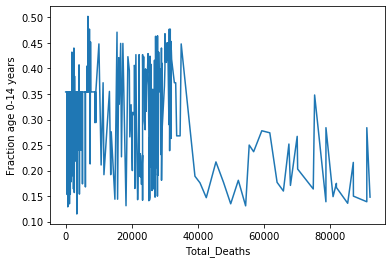

In [118]:
sns.lineplot(x='Total_Deaths', y='Fraction age 0-14 years', data=df_concat) 

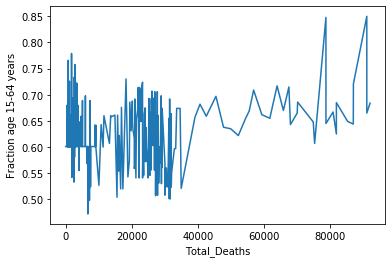

In [119]:
sns.lineplot(x='Total_Deaths', y='Fraction age 15-64 years', data=df_concat) 

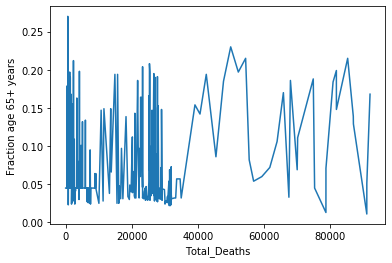

In [120]:
sns.lineplot(x='Total_Deaths', y='Fraction age 65+ years', data=df_concat) 

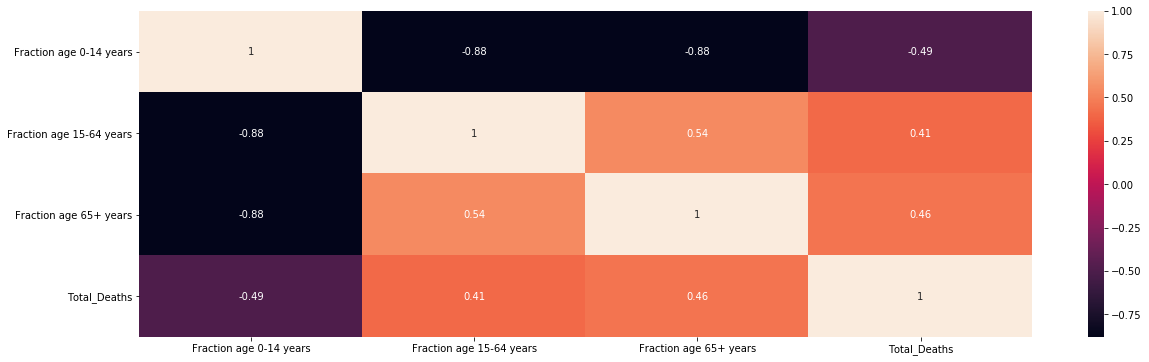

In [121]:
plt.figure(figsize=(20,6))
sns.heatmap(df_concat.corr(),annot=True) 

# Conclusion

As I can see in the Heat map that the positive correlation of Total_Deaths with Fraction age 65+ years is more than other age columns. Therefore according to me I can conclude that the people of Age above 65 or 65+ has the highest risk of dying from this Covid-19 virus. Also those between age 0-14 has the lowest risk of dying from this virus whereas those between 15 and 65 has also become victims to this virus. Therefore except the age 0 to 14 all others should be alert and cautious so that they do not catch this virus into their body.